In [46]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
import pdb

In [2]:
from fastai.structured import *
from fastai.column_data import *
import pandas as pd
from torch.nn import functional as F

In [3]:
torch.cuda.set_device(0)

In [4]:
df = pd.read_csv('sample.csv')

In [5]:
df.shape

(10000, 126)

In [6]:
df.head()

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_116,Feature_117,Feature_118,Feature_119,Feature_120,Feature_121,Feature_122,Feature_123,Feature_124,TARGET
0,1,6,7,4,3,8,6,5,-9461,0.014400,...,0.0,0.000,45.0,0.000,0,0.0,0.0,0.00,0.0,1
1,0,1,4,1,1,3,1,39,-16765,0.049700,...,0.0,0.000,10.0,113.130,0,0.0,0.0,0.00,0.0,0
2,1,6,7,4,3,8,1,11,-19046,0.042553,...,0.0,0.000,49.0,1561.590,0,0.0,0.0,1401.39,1350.0,0
3,0,6,7,4,0,8,6,5,-19005,0.042553,...,0.0,-4.455,48.0,4.455,0,0.0,0.0,0.00,0.0,0
4,1,6,7,4,3,3,4,37,-19932,0.042553,...,0.0,0.000,7.0,513.000,0,0.0,0.0,0.00,0.0,0


In [7]:
# Since this is just a proof of concept exercise, we will randomly choose the categorical and continuous vars 

In [8]:
cat_vars = ['Feature_0 ', 'Feature_1 ', 'Feature_2 ', 'Feature_3 ', 'Feature_4 ', 'Feature_5 ', 'Feature_6 ', 'Feature_7 ', 'Feature_8 ', 'Feature_9 ', 'Feature_10 ', 'Feature_11 ', 'Feature_12 ', 'Feature_13 ', 'Feature_14 ', 'Feature_15 ', 'Feature_16 ', 'Feature_17 ', 'Feature_18 ', 'Feature_19 ', 'Feature_20 ', 'Feature_21 ', 'Feature_22 ', 'Feature_23 ', 'Feature_24 ', 'Feature_25 ', 'Feature_26 ', 'Feature_27 ', 'Feature_28 ', 'Feature_29 ', 'Feature_30 ', 'Feature_31 ', 'Feature_32 ', 'Feature_33 ', 'Feature_34 ', 'Feature_35 ', 'Feature_36 ', 'Feature_37 ', 'Feature_38 ', 'Feature_39 ', 'Feature_40 ', 'Feature_41 ', 'Feature_42 ', 'Feature_43 ', 'Feature_44 ', 'Feature_45 ', 'Feature_46 ', 'Feature_47 ', 'Feature_48 ', 'Feature_49 ', 'Feature_50 ']
contin_vars = ['Feature_51 ', 'Feature_52 ', 'Feature_53 ', 'Feature_54 ', 'Feature_55 ', 'Feature_56 ', 'Feature_57 ', 'Feature_58 ', 'Feature_59 ', 'Feature_60 ', 'Feature_61 ', 'Feature_62 ', 'Feature_63 ', 'Feature_64 ', 'Feature_65 ', 'Feature_66 ', 'Feature_67 ', 'Feature_68 ', 'Feature_69 ', 'Feature_70 ', 'Feature_71 ', 'Feature_72 ', 'Feature_73 ', 'Feature_74 ', 'Feature_75 ', 'Feature_76 ', 'Feature_77 ', 'Feature_78 ', 'Feature_79 ', 'Feature_80 ', 'Feature_81 ', 'Feature_82 ', 'Feature_83 ', 'Feature_84 ', 'Feature_85 ', 'Feature_86 ', 'Feature_87 ', 'Feature_88 ', 'Feature_89 ', 'Feature_90 ', 'Feature_91 ', 'Feature_92 ', 'Feature_93 ', 'Feature_94 ', 'Feature_95 ', 'Feature_96 ', 'Feature_97 ', 'Feature_98 ', 'Feature_99 ', 'Feature_100 ', 'Feature_101 ', 'Feature_102 ', 'Feature_103 ', 'Feature_104 ', 'Feature_105 ', 'Feature_106 ', 'Feature_107 ', 'Feature_108 ', 'Feature_109 ', 'Feature_110 ', 'Feature_111 ', 'Feature_112 ', 'Feature_113 ', 'Feature_114 ', 'Feature_115 ', 'Feature_116 ', 'Feature_117 ', 'Feature_118 ', 'Feature_119 ', 'Feature_120 ', 'Feature_121 ', 'Feature_122 ', 'Feature_123 ', 'Feature_124 ']

In [9]:
dep = 'TARGET'
df = df[cat_vars+contin_vars+[dep]].copy()

In [10]:
for c in cat_vars:
    df[c] = df[c].astype('category').cat.as_ordered()

In [11]:
for v in contin_vars:
    df[v] = df[v].fillna(0).astype('float32')

In [12]:
cat_sz = [(c, len(df[c].cat.categories)+1) for c in cat_vars]

In [13]:
emb_szs = [(c, min(50, (c+1)//2)) for _,c in cat_sz]

In [14]:
df, y, nas, mapper = proc_df(df, 'TARGET', do_scale=True)

In [15]:
train_ratio = 0.75
train_size = int(len(df) * train_ratio); train_size
val_idx = list(range(train_size, len(df)))

## is_reg = False and is_multi = False

This means that the last layer operation is Log_softmax(x) and m.crit is nll_loss

In case there are more than 2 classes (multi-class), we will change the out_sz to (N,C).

To test this, we can simply add a random new class in the target variable, change the out size and run again. Please try this to understand it better!

In [16]:
md = ColumnarModelData.from_data_frame('', val_idx, df, y.astype('int'), cat_flds=cat_vars, bs=512,
                                       is_reg=False,is_multi=False)

In [17]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.01, 2, [500,100], [0.01,0.1])

In [18]:
m.crit

<function torch.nn.functional.nll_loss(input, target, weight=None, size_average=True, ignore_index=-100, reduce=True)>

In [19]:
# Verified that the m.crit is nll_loss and as per its definition
# in pytorch documentation we are providing the output size as (N,2)

In [20]:
m.lr_find()

 60%|██████    | 9/15 [00:00<00:00, 13.22it/s, loss=10.3] 


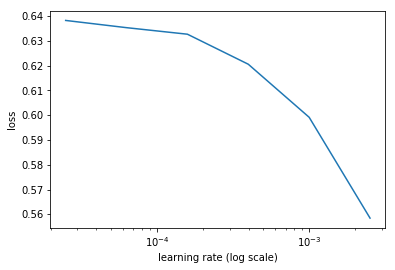

In [21]:
m.sched.plot(1)

In [22]:
# Since we will be using the metrics = [accuracy] while calling the fit function, lets first observe the way it works

In [23]:
a = torch.rand(5,2)

In [24]:
#This emulates the class probabilities which is what we get with out_sz=2 and works with NLL loss

a

tensor([[ 0.0091,  0.6286],
        [ 0.9524,  0.1957],
        [ 0.0985,  0.7809],
        [ 0.1952,  0.9461],
        [ 0.9975,  0.0371]])

In [25]:
# This is what the accuracy function should grab and then compare to the actual target
# and find mean of all matching cases


torch.max(a, dim=1) 

(tensor([ 0.6286,  0.9524,  0.7809,  0.9461,  0.9975]),
 tensor([ 1,  0,  1,  1,  0]))

In [26]:
# Let this be our hypothetical target

b = torch.LongTensor([0,0,1,1,1])

In [27]:
# This is how the code looks in the 'metrics.py' in fastai library

def accuracy(preds, targs):
    preds = torch.max(preds, dim=1)[1]
    return (preds==targs).float().mean()

In [28]:
# As expected, the acurracy is indeed the average of matching cases

accuracy(a,b)

tensor(0.6000)

In [29]:
m.fit(1e-5, n_cycle=2, cycle_len=1, cycle_mult=2, metrics=[accuracy])

epoch      trn_loss   val_loss   accuracy                  
    0      0.629261   0.623877   0.8092    
    1      0.615854   0.594717   0.8776                    
    2      0.603655   0.587973   0.8864                   



[0.5879732563972473, 0.8863999983787537]

## is_reg = False and is_multi = True

This means that the last layer operation is Sigmoid(x) and m.crit is BCE

In [30]:
md = ColumnarModelData.from_data_frame('', val_idx, df, y.astype(np.float32), cat_flds=cat_vars, bs=512,
                                       is_reg=False,is_multi=True)

In [31]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.01, 1, [500,100], [0.01,0.1])

In [32]:
m.crit

<function torch.nn.functional.binary_cross_entropy(input, target, weight=None, size_average=True, reduce=True)>

In [33]:
# Verified that the m.crit is BCE and as per its definition
# in pytorch documentationm we are providing the output size as (N,1)

In [47]:
m.lr_find()

epoch      trn_loss   val_loss                            
    0      2.068535   2.166272  



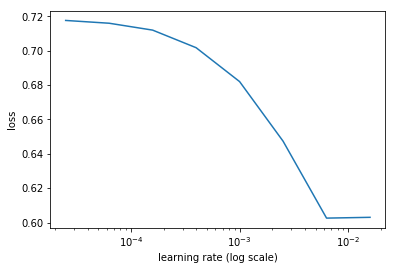

In [35]:
m.sched.plot(1)

In [36]:
# Since we will be using the metrics = [accuracy_multi] while calling the fit function, lets first observe the way it works

In [37]:
a = torch.rand(5)

In [38]:
# This is what our probablities should look like, the assumption is that we are prediction the probability of class 1

a

tensor([ 0.3924,  0.3371,  0.1699,  0.8915,  0.3875])

In [39]:
# Filtering with threshold

(a>0.5).float()

tensor([ 0.,  0.,  0.,  1.,  0.])

In [40]:
# Let this be our hypothetical target

b = torch.FloatTensor([0,0,1,1,1])

In [49]:
def accuracy_multi(preds, targs, thresh=0.5):
    return ((preds>thresh).float()==targs).float().mean()

In [42]:
torch.eq((a>0.5).float(),b).float().mean() # With regular logic

tensor(0.6000)

In [43]:
accuracy_multi(a, b, thresh=0.5) # As per our function

tensor(0.6000)

In [48]:
m.fit(1e-5, n_cycle=2, cycle_len=1, cycle_mult=2, metrics=[accuracy_multi]) 

epoch      trn_loss   val_loss   accuracy_multi            
    0      0.663803   0.657096   0.772413  
    1      0.653609   0.634112   0.856147                  
    2      0.643741   0.628819   0.865255                 



[0.6288188921928406, 0.8652553681373596]

In [145]:
# I'm still not sure how to use the accuracy_multi if I don't set the default threshold in the function definition,
# I also can't pass just threshold during fit as it would require preds and targs


# Any help with this is very much appreciated !!!

## is_reg = True

We are not working out this example here as it is clearly described in rossman notebook.

In [ ]:
This was a reply on the forum which really helped me understand the flow of the forward pass in the MixeInputModel

If not regression:
    If more than 1 class could be present for an observation:
        Use sigmoid
    Else only one class per observation:
        Use softmax

Else If regression and if a range is provided:
     Constrain the predictions be within the max and min of y_range

Otherwise, end with a linear activation